<a href="https://colab.research.google.com/github/arkaprabha10/Social-Network-Analysis/blob/main/trial%20epinion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import community
import community.community_louvain as community_louvain
import networkx as nx
import random
import collections

In [7]:
# Run this cell only on colab
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [8]:
# for csv file
# Run this cell only on colab
link='https://drive.google.com/file/d/1KJ8Lb7RrvnRJGQOEKEjbdG8fq1UbBmWk/view?usp=sharing'
id = link.split("/")[-2] 
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('data.txt')

In [9]:
graph = nx.DiGraph()
epi_csv = pd.read_csv('data.txt', delimiter="\t")
print(epi_csv.shape)
print(epi_csv.head(5))
epi_csv.columns = ['From','To','Weight']
# We check if the file has loaded
epi_csv.head()

# Adding the edges.
for index,row in epi_csv.iterrows():
    graph.add_edges_from([(row[0],row[1])],weight = row[2])

(841372, 3)
   Source  Destination  Weight
0       0            1      -1
1       1       128552      -1
2       2            3       1
3       4            5      -1
4       4          155      -1


In [5]:
# Number of nodes
print(graph.number_of_nodes())

# Number of edges
print(graph.number_of_edges())

# Positive and negative edges 

Stats = pd.DataFrame(graph.out_degree(),columns=['From','Outdegree']).sort_values('From')
Stats_2 =  pd.DataFrame(graph.in_degree(),columns=['To','Indegree']).sort_values('To')
b= epi_csv.groupby('From',as_index=False)[['Weight']].sum().sort_values('From')
c= epi_csv.groupby('To',as_index=False)[['Weight']].sum().sort_values('To')
Stats = Stats.merge(b,on='From',how='left')
Stats_2 = Stats_2.merge(c,on='To',how='left')
Stats['Pos_out'] = (  Stats['Outdegree'] + Stats['Weight']  )/2
Stats['Neg_out'] = (  Stats['Outdegree'] - Stats['Weight']  )/2
Stats_2['Pos_in']= (Stats_2['Indegree']  + Stats_2['Weight'])/2
Stats_2['Neg_in']= (Stats_2['Indegree']  - Stats_2['Weight'])/2
Stats = pd.merge(Stats,Stats_2,left_on='From', right_on='To').drop('To', axis=1)
Stats = Stats.drop(['Weight_x','Weight_y'],axis=1)
Stats.fillna(0,inplace=True)
Stats.head()

131828
841372


,From,Outdegree,Pos_out,Neg_out,Indegree,Pos_in,Neg_in
0,0,1,0.0,1.0,0,0.0,0.0
1,1,1,0.0,1.0,2,1.0,1.0
2,2,1,1.0,0.0,1,1.0,0.0
3,3,0,0.0,0.0,4,4.0,0.0
4,4,14,9.0,5.0,1,1.0,0.0


In [6]:
Stats.describe()
print(Stats.max(axis=0))

From         131827.0
Outdegree      2070.0
Pos_out        2070.0
Neg_out        1562.0
Indegree       3478.0
Pos_in         3338.0
Neg_in          540.0
dtype: float64


In [7]:
print(graph.number_of_edges())
print(graph.number_of_nodes())
print(nx.average_clustering(graph))
print(nx.transitivity(graph))
print(nx.density(graph))

841372
131828
0.09561744905322256
0.07428166527700729
4.841456374018419e-05


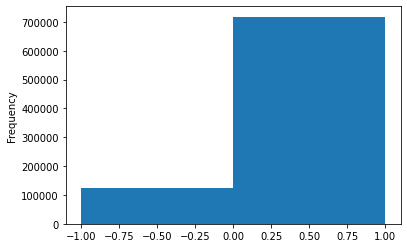

In [21]:
epi_csv['Weight'].plot.hist(bins=2, alpha=1)
plt.xlabel('')
plt.show()

Counter({0: 47227, 1: 39613, 2: 12764, 3: 6687, 4: 4191, 5: 2964, 6: 2173, 7: 1667, 8: 1310, 9: 1081, 10: 878, 11: 749, 12: 624, 13: 560, 14: 501, 15: 457, 16: 384, 17: 365, 20: 295, 19: 281, 18: 262, 21: 245, 22: 224, 23: 203, 24: 198, 27: 161, 25: 159, 26: 158, 30: 146, 28: 142, 29: 140, 31: 138, 34: 131, 36: 122, 32: 118, 33: 114, 39: 109, 35: 103, 37: 96, 41: 93, 40: 91, 44: 87, 38: 86, 43: 79, 42: 73, 47: 71, 46: 69, 45: 65, 51: 60, 58: 52, 50: 52, 48: 52, 56: 49, 49: 49, 60: 48, 54: 47, 55: 46, 52: 45, 66: 44, 57: 44, 53: 44, 62: 43, 77: 42, 74: 40, 63: 39, 65: 38, 61: 38, 73: 36, 68: 33, 64: 33, 59: 33, 87: 32, 71: 32, 94: 31, 80: 31, 75: 31, 84: 30, 67: 30, 81: 29, 100: 28, 82: 28, 76: 28, 72: 28, 93: 27, 89: 27, 70: 26, 69: 26, 88: 24, 79: 24, 103: 23, 97: 23, 86: 23, 78: 23, 114: 21, 106: 21, 96: 21, 83: 21, 102: 20, 91: 20, 129: 19, 105: 19, 95: 19, 99: 18, 85: 18, 118: 17, 111: 17, 92: 17, 90: 17, 134: 16, 133: 16, 124: 16, 116: 16, 112: 16, 108: 16, 104: 16, 120: 15, 169: 

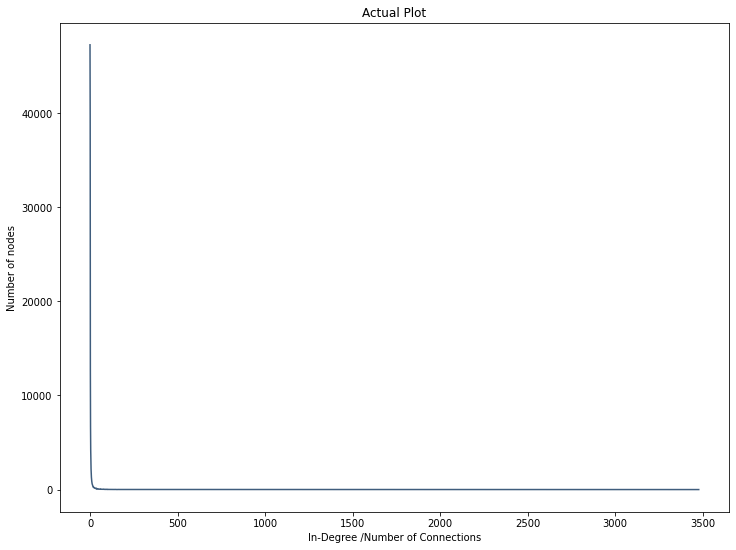

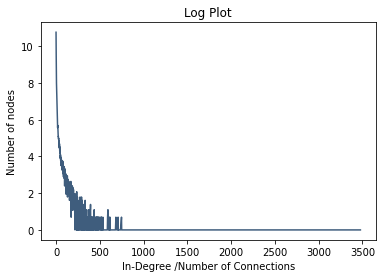

In [16]:
# Degree distribtion for In-degree
degree_sequence = sorted([d for n, d in graph.in_degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
print(degreeCount)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots(figsize=(12, 9))
plt.plot(deg,cnt,color="#3F5D7D")
plt.xlabel('In-Degree /Number of Connections')
plt.ylabel('Number of nodes')
plt.title('Actual Plot')
plt.show()
print()
plt.plot(deg,(np.log(cnt)),color="#3F5D7D")
plt.xlabel('In-Degree /Number of Connections')
plt.ylabel('Number of nodes')
plt.title('Log Plot')
plt.show()



Counter({1: 52848, 0: 36510, 2: 12685, 3: 6044, 4: 3694, 5: 2601, 6: 1987, 7: 1400, 8: 1085, 9: 953, 10: 739, 11: 665, 12: 575, 13: 493, 14: 448, 15: 413, 16: 372, 17: 329, 19: 286, 18: 275, 21: 244, 20: 243, 22: 214, 23: 196, 24: 190, 25: 171, 26: 157, 27: 155, 28: 148, 29: 145, 30: 141, 33: 139, 31: 128, 32: 123, 35: 114, 34: 108, 40: 106, 41: 101, 37: 101, 36: 101, 38: 99, 44: 92, 39: 90, 43: 86, 42: 82, 53: 70, 47: 70, 48: 68, 46: 68, 50: 67, 45: 65, 54: 64, 52: 62, 59: 59, 57: 59, 66: 56, 51: 56, 49: 56, 67: 53, 58: 52, 73: 50, 63: 50, 65: 49, 74: 48, 64: 47, 76: 44, 56: 43, 55: 43, 60: 42, 72: 40, 62: 40, 61: 39, 71: 38, 68: 38, 69: 36, 82: 35, 83: 34, 70: 33, 81: 32, 79: 31, 101: 30, 100: 30, 85: 30, 78: 30, 77: 30, 96: 28, 94: 28, 84: 28, 75: 28, 99: 27, 118: 26, 88: 26, 87: 26, 107: 25, 86: 25, 108: 24, 98: 24, 97: 24, 91: 24, 89: 24, 111: 23, 110: 23, 109: 23, 93: 23, 102: 22, 127: 21, 104: 21, 95: 21, 92: 21, 90: 21, 106: 20, 120: 18, 125: 17, 149: 16, 133: 16, 117: 16, 115:

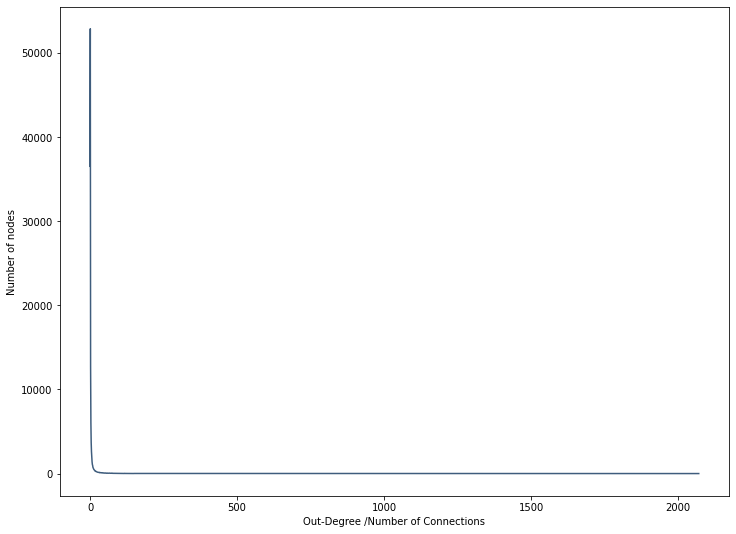

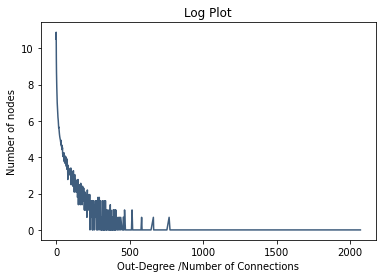

In [17]:
# Degree distribtion for out-degree
degree_sequence = sorted([d for n, d in graph.out_degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
print(degreeCount)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots(figsize=(12, 9))
plt.plot(deg,cnt,color="#3F5D7D")
plt.xlabel('Out-Degree /Number of Connections')
plt.ylabel('Number of nodes')
plt.show()

print()
plt.plot(deg,(np.log(cnt)),color="#3F5D7D")
plt.xlabel('Out-Degree /Number of Connections')
plt.ylabel('Number of nodes')
plt.title('Log Plot')
plt.show()



In [40]:
# Degree centrality stats
print("In-degree")
in_degree_centrality_nodes = nx.in_degree_centrality(graph)
in_degree_centrality_nodes = collections.Counter(in_degree_centrality_nodes)
for k, v in in_degree_centrality_nodes.most_common(10):
  print ((k, v))
print("\n Out-degree \n")
out_degree_centrality_nodes = nx.out_degree_centrality(graph)
out_degree_centrality_nodes = collections.Counter(out_degree_centrality_nodes)
for k, v in out_degree_centrality_nodes.most_common(10):
  print ((k, v))

# degree_centrality_nodes = nx.degree_centrality(graph)
# degree_centrality_nodes = collections.Counter(degree_centrality_nodes)
# for k, v in degree_centrality_nodes.most_common(100):
#   print (k,v)


In-degree
(25, 0.02638306265029167)
(2292, 0.013904587072451015)
(366, 0.011879205322126727)
(2293, 0.011317863563609884)
(433, 0.010657907712380621)
(161, 0.010293794139288614)
(5, 0.010286208439849197)
(1352, 0.009838652172923604)
(450, 0.00977796657740827)
(1089, 0.009550395594225766)

 Out-degree 

(68214, 0.0157023978395928)
(12168, 0.015672055041835133)
(112586, 0.015603783746880382)
(72164, 0.014701085513589781)
(167, 0.014359729038816025)
(321, 0.013502545002161925)
(353, 0.013221874122903503)
(1652, 0.013168774226827586)
(966, 0.011439234754640553)
(655, 0.009375924507119179)


In [42]:
# Eigen Vector centrality stats
print("Eigen Vector centrality")
eigenvector_centrality_nodes = nx.eigenvector_centrality_numpy(graph)
eigenvector_centrality_nodes = collections.Counter(eigenvector_centrality_nodes)
for k, v in eigenvector_centrality_nodes.most_common(10):
  print ((k, v))


Eigen Vector centrality
(11714, 0.09156136036870025)
(11824, 0.09070215020780753)
(11841, 0.09018662392050528)
(11693, 0.08876798592399611)
(11689, 0.08697265655066026)
(56140, 0.08660357470087023)
(11704, 0.08637572445770758)
(11853, 0.08631141183323351)
(11863, 0.08629382296174856)
(11722, 0.0856026606508563)


In [1]:
# Katz centrality stats
# Not running on colab
print("Katz centrality")
katz_centrality_numpy_nodes = nx.katz_centrality_numpy(graph)
katz_centrality_numpy_nodes = collections.Counter(katz_centrality_numpy_nodes)
for k, v in katz_centrality_numpy_nodes.most_common(10):
  print ((k, v))


Katz centrality


NameError: ignored

In [12]:
# Closeness centrality stats
# Not running on colab
print("closeness centrality ")
closeness_centrality_nodes = nx.closeness_centrality(graph)
closeness_centrality_nodes = collections.Counter(closeness_centrality_nodes)
for k, v in closeness_centrality_nodes.most_common(10):
  print ((k, v))


closeness centrality 


KeyboardInterrupt: ignored

In [18]:
# Betweenness centrality stats
# Not running on colab
print("Betweenness centrality ")
betweenness_centrality_nodes = nx.betweenness_centrality(graph)
betweenness_centrality_nodes = collections.Counter(betweenness_centrality_nodes)
for k, v in betweenness_centrality_nodes.most_common(10):
  print ((k, v))


Betweenness centrality 


KeyboardInterrupt: ignored

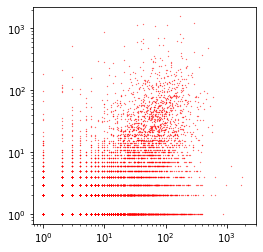

In [ ]:
# Out degree and indegree relationship, relationship between positive and negative weighted outgoing 
# edges in the network and relationship between positive and negative ingoing edges.

plt.figure(figsize=(4,4))
plt.plot(Stats['Pos_out'],Stats['Neg_out'],'ro',markersize=0.25)
plt.xscale('log')
plt.yscale('log')

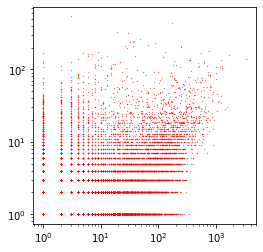

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(Stats['Pos_in'],Stats['Neg_in'],'ro',markersize=0.25)
plt.xscale('log')
plt.yscale('log')

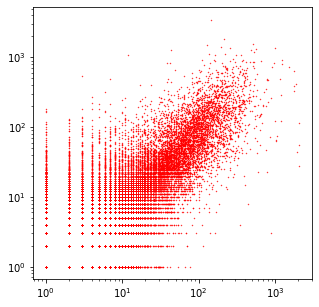

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(Stats['Outdegree'],Stats['Indegree'],'ro',markersize=0.4)
plt.xscale('log')
plt.yscale('log')

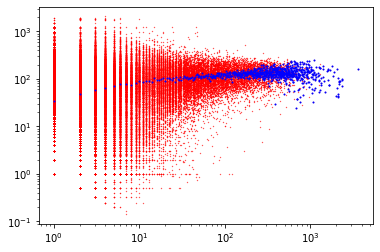

In [ ]:
Deg_cor = nx.average_neighbor_degree(graph,target='out')
dict_list = []
for key, value in Deg_cor.items():
    temp = [key,value]
    temp[0] = graph.degree(key,'out')
    dict_list.append(temp)
dfa1 = pd.DataFrame(dict_list,columns =['Outdegree','Average neighbors outdegree'])
dfa2 = dfa1.groupby('Outdegree',as_index=False)['Average neighbors outdegree'].mean()
plt.plot(dfa1['Outdegree'],dfa1['Average neighbors outdegree'],'ro',markersize=0.3)
plt.plot(dfa2['Outdegree'],dfa2['Average neighbors outdegree'],'bo',markersize=1)
plt.xscale('log')
plt.yscale('log')

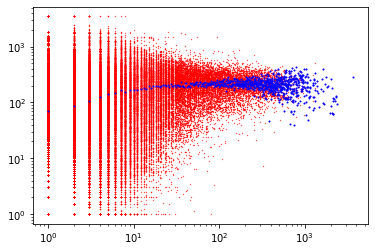

In [ ]:
Deg_cor = nx.average_neighbor_degree(graph,target='in')
dict_list = []
for key, value in Deg_cor.items():
    temp = [key,value]
    temp[0] = graph.degree(key,'in')
    dict_list.append(temp)
dfa1 = pd.DataFrame(dict_list,columns =['Indegree','Average neighbors indegree'])
dfa2 = dfa1.groupby('Indegree',as_index=False)['Average neighbors indegree'].mean()
plt.plot(dfa1['Indegree'],dfa1['Average neighbors indegree'],'ro',markersize=0.3)
plt.plot(dfa2['Indegree'],dfa2['Average neighbors indegree'],'bo',markersize=1)

plt.xscale('log')
plt.yscale('log')

In [ ]:
print(nx.degree_assortativity_coefficient(graph,'in','in'))
print(nx.degree_assortativity_coefficient(graph,'out','out'))

0.052842835204915777
0.0503775939362448


In [ ]:
nx.degree_assortativity_coefficient(graph)

0.017546784587849914

In [ ]:
# Let top 200 out of 300 people adopt a certain opinion
import random
random.seed(5)
op1 = Stats[['From','Pos_in']].sort_values(by=['Pos_in'], ascending=False)[0:300]
op2 = Stats[['From','Neg_in']].sort_values(by=['Neg_in'], ascending=False)[0:100]
adopters =  random.sample(list(op1['From']), k=200) + random.sample(list(op2['From']), k=50)
Stats['Adopt']   = 0
Stats['Heard']   = 0
Stats['Adopted'] = 0
for node in adopters :
    Stats.loc[node-1,'Adopt'] = 1

Total_adopters = 250
c = []
change = True
threshold = 0.4
j=0 
while change:
    new_adopters = 0
    for node in graph.nodes:
        if Stats.loc[node-1,'Heard'] == 0:
            Stats.at[node-1,'Heard'] = j
        if Stats.loc[node-1,'Adopt'] == 0 and graph.out_degree(node)!= 0:
            trust_ch = 0
            no_out = graph.out_degree(node) 
            for outgoing in graph.successors(node):
                if Stats.loc[outgoing-1,'Adopt'] == 1:
                    trust_ch += graph.get_edge_data(node,outgoing).get('weight')
            if trust_ch / no_out > threshold:
                Stats.at[node-1,'Adopt'] = 1
                Stats.at[node-1,'Adopted'] = j
                new_adopters += 1
    c.append(new_adopters)  
    j+=1 
    print('The number of new adopters at step ' + str(j) + ' is ' + str(new_adopters))
    if new_adopters == 0:
        change = False

KeyError: -1

In [ ]:
import random
random.seed(5)
op1 = Stats[['From','Pos_in']].sort_values(by=['Pos_in'], ascending=False)[0:300]
op2 = Stats[['From','Neg_in']].sort_values(by=['Neg_in'], ascending=False)[0:100]
adopters =  random.sample(list(op1['From']), k=200) + random.sample(list(op2['From']), k=50)
Stats['Adopt']   = 0
Stats['Heard']   = 0
Stats['Adopted'] = 0
for node in adopters :
    Stats.loc[node-1,'Adopt'] = 1

<AxesSubplot:>

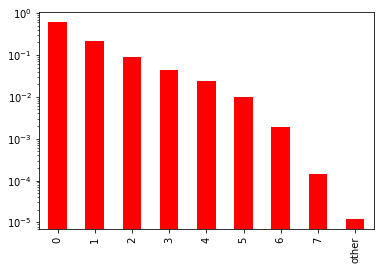

In [ ]:
import math
pos = Stats['Indegree'][Stats['Indegree'] != 0]
pos = pos.transform(lambda x: math.floor(math.log(x)) )

prob = pos.value_counts(normalize=True)
threshold = 0.0001
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='bar',log=True,color='r')

In [ ]:
import math
import igraph
pos = Stats['Indegree'][Stats['Indegree'] != 0]
igraph.power_law_fit(pos)

FittedPowerLaw(continuous=False, alpha=1.7049436066757273, xmin=1.0, L=-197839.7497898456, D=0.02086119220655669, p=2.0979557169839488e-32)

In [ ]:
nx.degree_assortativity_coefficient(graph,'in')

0.052842835204915777

In [ ]:
nx.degree_assortativity_coefficient(graph,'out')


0.017546784587849914

In [ ]:
nx.degree_assortativity_coefficient(graph)


0.017546784587849914

In [ ]:
SCC = max(nx.strongly_connected_components(graph), key=len)
print('Size of maximal strongly connected component is ' + str(len(SCC)))
WCC = max(nx.weakly_connected_components(graph), key=len)
print('Size of maximal weakly connected component is ' + str(len(WCC)))
DIF = list(set(WCC)-set(SCC))
OUT_C = []
IN_C = []
IN = 0
OUT = 0
for index, node1 in enumerate(DIF):
    for index2, node2 in enumerate(SCC):
        
        if graph.has_edge(node1,node2):
            OUT+=1
            OUT_C.append(node2)
            break
        elif graph.has_edge(node2,node1):
            IN+=1
            IN_C.append(node1)
            break

    
TND = len(DIF)-IN-OUT
print(IN,OUT,TND)

Size of maximal strongly connected component is 41441
Size of maximal weakly connected component is 119130
29732 37682 10275


In [ ]:
SCC = max(nx.strongly_connected_components(graph), key=len)
scc_com = graph.subgraph(SCC).copy()
scc2 = nx.Graph(scc_com)

# Removing the weights.

for u,v,d in scc2.edges(data=True):
    d['weight']=1

communities =community_louvain.best_partition(scc2,random_state=5)

In [ ]:
print(set(communities.values()))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
ind_graph = community_louvain.induced_graph(communities, scc2)

inv_map = dict()
for key, value in communities.items():
    inv_map.setdefault(value, list()).append(key)
    
# Removing the small communities

inv_map2 = {key:val for key, val in inv_map.items() if len(val) >= 100}
sizes = np.array([len(inv_map2[k]) for k in list(inv_map2.keys())])

# Removing edges from the graph:

inv_keys = [key for key in inv_map2]
ind_nodes = list(ind_graph.nodes())
for node in ind_nodes:
    if node not in inv_keys:
        ind_graph.remove_node(node)

In [ ]:
community_louvain.modularity(communities,scc2)

0.4328499720766367

In [ ]:
print(sizes)

[10032 10540   453 11587  4309   221   143   945   311   111   124]


<AxesSubplot:>

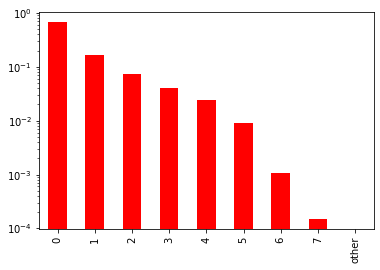

In [ ]:
import math
pos = Stats['Outdegree'][Stats['Outdegree'] != 0]
pos = pos.transform(lambda x: math.floor(math.log(x)) )

prob = pos.value_counts(normalize=True)
threshold = 0.0001
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='bar',log=True,color='r')

In [ ]:
import math
import igraph
pos = Stats['Outdegree'][Stats['Outdegree'] != 0]
igraph.power_law_fit(pos)

FittedPowerLaw(continuous=False, alpha=1.7290327710653879, xmin=2.0, L=-133428.12747064946, D=0.019071101789395528, p=7.660462830458217e-14)

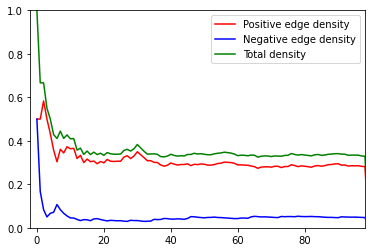

0.6515615431720759

In [ ]:
# We want to see the rich club effect in the 100 edges with the highest indegree.
picked = 100
rce1 = Stats[['From','Indegree']].sort_values(by=['Indegree'], ascending=False)[0:picked]
rich = list(rce1.From.values)
rece_graph = graph.subgraph(rich).copy()
# Dropping first value

densities = np.zeros((3,picked))
pos_edges = 0
neg_edges = 0 
for rank, node1 in enumerate(rich[1::]):
    
    for rank2, node2 in enumerate(rich[:rank+1]): 
        if graph.has_edge(node1, node2):
            if graph[node1][node2]['weight'] == 1:
                pos_edges += 1
            else:
                neg_edges += 1
        if graph.has_edge(node2, node1):
            if graph[node2][node1]['weight'] == 1:
                pos_edges += 1
            else:
                neg_edges += 1
            
    densities[0][rank] = pos_edges/(rank+2)/(rank+1)
    densities[1][rank] = neg_edges/(rank+2)/(rank+1)
    densities[2][rank] = (pos_edges + neg_edges)/(rank+2)/(rank+1)
    

plt.plot( [i for i in range(0,picked)],densities[0,],'r-',label='Positive edge density')
plt.plot( [i for i in range(0,picked)],densities[1,],'b-',label='Negative edge density')
plt.plot( [i for i in range(0,picked)],densities[2,],'g-',label='Total density')
plt.legend(loc="upper right")
plt.ylim((0,1))
plt.xlim((-2,picked-2))
plt.show()


# Checking the one sidedness
nx.reciprocity(rece_graph)

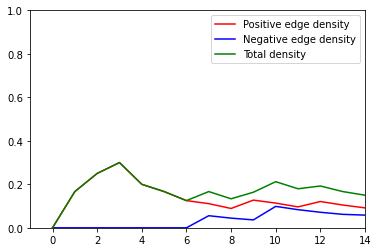

In [ ]:
# We want to see the rich club effect in the 100 edges with the highest negative_degree.
picked = 16
rce2 = Stats[['From','Neg_in']].sort_values(by=['Neg_in'], ascending=False)[4:picked+4]
rich = list(rce2.From.values)
# Dropping first value

densities = np.zeros((3,picked))
pos_edges = 0
neg_edges = 0 

for rank, node1 in enumerate(rich[1::]):
    
    for rank2, node2 in enumerate(rich[:rank+1]): 
        if graph.has_edge(node1, node2):
            if graph[node1][node2]['weight'] == 1:
                pos_edges += 1
            else:
                neg_edges += 1
        if graph.has_edge(node2, node1):
            if graph[node2][node1]['weight'] == 1:
                pos_edges += 1
            else:
                neg_edges += 1
                
            
    densities[0][rank] = pos_edges/(rank+2)/(rank+1)
    densities[1][rank] = neg_edges/(rank+2)/(rank+1)
    densities[2][rank] = (pos_edges + neg_edges)/(rank+2)/(rank+1)
    

plt.plot( [i for i in range(0,picked)],densities[0,],'r-',label='Positive edge density')
plt.plot( [i for i in range(0,picked)],densities[1,],'b-',label='Negative edge density')
plt.plot( [i for i in range(0,picked)],densities[2,],'g-',label='Total density')
plt.legend(loc="upper right")
plt.ylim((0,1))
plt.xlim((-1,picked-2))
plt.show()